# <center> Projet d'économétrie SIM722 <center>

<u>Devoir fait par :<u>  Rodolphe Calvet, Jean-Philippe Quach

Les points sont proportionnels à la difficulté des questions. Justifiez toutes vos réponses et étapes du raisonnement. Tous les tests sont demandés à 5% sauf si spécifié dans la question.


# Import de librarie

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t
from scipy.stats import f
import warnings
warnings.filterwarnings("ignore")

# <u>Partie 1. Régression<u>

### 1. Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

In [2]:
head = pd.read_csv('../Cours_1/textfiles/MROZ.DES', delim_whitespace=True, usecols=[1]).drop([0, 1, 2, 3]).values.flatten()
df = pd.read_csv('../Cours_1/textfiles/MROZ.raw',delim_whitespace=True, header=None, names= head)
df["wage"] = pd.to_numeric(df["wage"],errors='coerce')
df_wage = df.loc[df["wage"]>0]


In [3]:
df_wage

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1,680,0,5,36,10,2.3118,0.00,3430,43,...,19772,0.7215,7,7,7.5,0,2,18.199980,.8380265,4
424,1,2450,0,1,40,12,5.3061,6.50,2008,40,...,35641,0.6215,7,7,5.0,1,21,22.641060,1.668857,441
425,1,2144,0,2,43,13,5.8675,0.00,2140,43,...,34220,0.5815,7,7,7.5,1,22,21.640080,1.769429,484
426,1,1760,0,1,33,12,3.4091,3.21,3380,34,...,30000,0.5815,12,16,11.0,1,14,23.999980,1.226448,196


In [4]:
df_wage.columns

Index(['inlf', 'hours', 'kidslt6', 'kidsge6', 'age', 'educ', 'wage', 'repwage',
       'hushrs', 'husage', 'huseduc', 'huswage', 'faminc', 'mtr', 'motheduc',
       'fatheduc', 'unem', 'city', 'exper', 'nwifeinc', 'lwage', 'expersq'],
      dtype='object')

### 2. Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieure au 65ème percentile de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur au 65ème percentile de l’échantillon. Commenter

In [5]:
df_des = df_wage[["wage", "age","educ"]]
df_des.describe()

,wage,age,educ
count,428.000000,428.000000,428.000000
mean,4.177682,41.971963,12.658879
std,3.310282,7.721084,2.285376
min,0.128200,30.000000,5.000000
25%,2.262600,35.000000,12.000000
50%,3.481900,42.000000,12.000000
75%,4.970750,47.250000,14.000000
max,25.000000,60.000000,17.000000


In [6]:
percentile_65th = df_wage.describe(percentiles=[.25, .5, .65 , .75]).iloc[6].iloc[11]
df_sup_65th = df_wage.loc[df_wage["huswage"]>percentile_65th][["wage", "age","educ"]]
df_sup_65th.describe()

,wage,age,educ
count,148.000000,148.00000,148.000000
mean,5.139315,42.52027,13.520270
std,4.351728,7.35168,2.345845
min,0.213700,30.00000,5.000000
25%,2.561925,36.00000,12.000000
50%,4.008050,43.00000,13.000000
75%,6.516300,48.00000,16.000000
max,25.000000,59.00000,17.000000


In [7]:
df_inf_65th = df_wage.loc[df_wage["huswage"]<percentile_65th][["wage", "age","educ"]]
df_inf_65th.describe()

,wage,age,educ
count,276.000000,276.000000,276.000000
mean,3.653995,41.583333,12.221014
std,2.471311,7.910656,2.126472
min,0.128200,30.000000,6.000000
25%,2.139100,35.000000,12.000000
50%,3.169700,41.000000,12.000000
75%,4.508775,47.000000,12.250000
max,22.500000,60.000000,17.000000


Reste à faire :  <u> à commenter <u>

### 3. Faire l'histogramme de la variable wage. Supprimer les observations qui sont à plus de 3 écart-types de la moyenne et refaire l’histogramme

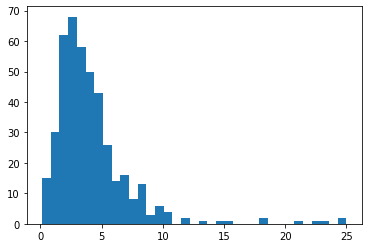

In [8]:
wage = df_des["wage"]
plt.hist(wage, 'auto')
plt.show()

In [9]:
mean = df_des.describe().iloc[1].iloc[0]
std = df_des.describe().iloc[2].iloc[0]
df_3std = df_des.loc[df_des["wage"]<= mean + 3*std]
df_3std

,wage,age,educ
0,3.3540,32,12
1,1.3889,30,12
2,4.5455,35,12
3,1.0965,34,12
4,4.5918,31,14
...,...,...,...
423,2.3118,36,10
424,5.3061,40,12
425,5.8675,43,13
426,3.4091,33,12


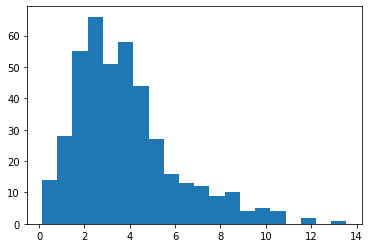

In [10]:
plt.hist(df_3std["wage"], 'auto')
plt.show()


### 4. Calculer les corrélations motheduc et fatheduc. Expliquer le problème de multi-collinéarité. Commenter.

In [11]:
df_use = df_wage.copy()
df_use = df_use.loc[df_use["wage"]<= mean + 3*std]
df_use

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1,680,0,5,36,10,2.3118,0.00,3430,43,...,19772,0.7215,7,7,7.5,0,2,18.199980,.8380265,4
424,1,2450,0,1,40,12,5.3061,6.50,2008,40,...,35641,0.6215,7,7,5.0,1,21,22.641060,1.668857,441
425,1,2144,0,2,43,13,5.8675,0.00,2140,43,...,34220,0.5815,7,7,7.5,1,22,21.640080,1.769429,484
426,1,1760,0,1,33,12,3.4091,3.21,3380,34,...,30000,0.5815,12,16,11.0,1,14,23.999980,1.226448,196


In [12]:
df_use[["motheduc", "fatheduc"]].corr()

,motheduc,fatheduc
motheduc,1.000000,0.548725
fatheduc,0.548725,1.000000


Les variables motheduc et fatheduc ont une corrélation linéaire de 0.54. Le problème de multicolinéarité est que le determinant de (X'X) va se rapprocher de 0 et donc sont inverses va exploser. S'il explose, on aura une variance hyper grande et nos test vont être moins robustes.

### 5. Faites un graphique en nuage de point entre wage et educ,. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"

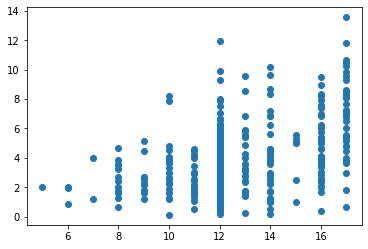

In [13]:
plt.scatter(df_use["educ"],df_use["wage"])
plt.show()

Non car les autres variables explicatives varient. <u> à vérifier, je ne suis pas sûr <u>

### 6. Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ? Expliquer le biais de variable omise.


L'hypothèse fondamentale qui garantit des estimateurs non biaisés est l'homoscédasticité, c'est le fait que la variance des résidus soit constante. Elle permet de garantir que l'estimateur des Moindres Carrés Ordinaires (MCO) est sans biais. Si l'hypothèse fondamentale est respectée ce sont des variance BLUE (Best Linear Unbiased)

$\beta^{*} = (X'X)^{-1} X'(X\beta+u)$  
$\beta^{*} = (X'X)^{-1} X'X\beta + (X'X)^{-1} X'u$  
$\beta^{*} = \beta+ X'u $  
$\mathbb{E}(\beta^{*}) = \beta + \mathbb{E}(X'u)$

si X'u est corrélé, il y aura un biais, si non corrélé :

$\mathbb{E}(\beta^{*}) = \beta$

### 7. Faire la régression du log de wage en utilisant comme variables explicatives une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus.

Notre modèle :  
$ Log(\widehat{wage}) = \beta_{const} + \beta_{nwifeinc}X_{nwifeinc} + \beta_{educ}X_{educ} + \beta_{exper}X_{exper} + \beta_{city}X_{city} + \beta_{kidslt6}X_{kidslt6} +\beta_{kidsge6}X_{kidsge6} + u $ 

In [14]:
y = np.log(df_use["wage"])
s=np.shape(df_use["wage"])
const=np.ones(s)
city = df_use["city"]
educ = df_use["educ"]
exper = df_use["exper"]
nwifeinc = df_use["nwifeinc"]
kidslt6 = df_use["kidslt6"]
kidsge6 = df_use['kidsge6']
X=np.column_stack((const,city, educ, exper, nwifeinc,kidslt6 , kidsge6))
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())
u=results.resid

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     14.41
Date:                Sun, 16 May 2021   Prob (F-statistic):           6.13e-15
Time:                        16:38:50   Log-Likelihood:                -392.18
No. Observations:                 419   AIC:                             798.4
Df Residuals:                     412   BIC:                             826.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4379      0.195     -2.243      0.0

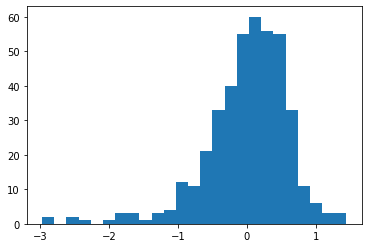

In [15]:
plt.hist(u, 'auto')
plt.show()

Reste à faire :  <u> à commenter <u>

### 8. Tester l'hypothèse de non significativité de nwifeinc avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values.

In [16]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     14.41
Date:                Sun, 16 May 2021   Prob (F-statistic):           6.13e-15
Time:                        16:38:51   Log-Likelihood:                -392.18
No. Observations:                 419   AIC:                             798.4
Df Residuals:                     412   BIC:                             826.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4379      0.195     -2.243      0.0

la statistique de student de newifeinc est de 1.376 et sa p-value est de 17% ce qui veut dire qu'on rejette à plus de 17 %.  
Or à 1%, 5%, 10% on ne rejette pas H0, donc le coefficient nwifeinc n'est pas significatif.

### 9. Tester l’hypothèse que le coefficient associé à nwifeinc est égal à 0.01 avec un seuil de significativité de 5% (test à alternatif des deux côtés)

In [17]:
beta = np.linalg.inv(X.T @ X)@X.T@y
u=y-X@beta
n,k=np.shape(X)
sig2=u.T@u/(n-k)
Var=sig2*np.linalg.inv(X.T @ X)
std=np.sqrt(np.diag(Var))

In [18]:
ddl = n - k 
print("degree de liberté de la loi de student n - k = ", ddl)

### percentile
q=1-0.025

seuil = t.ppf(q,ddl)

print("Seuil de rejet", seuil)

degree de liberté de la loi de student n - k =  412
Seuil de rejet 1.9657385889937118


In [19]:
std

array([0.19523919, 0.06574661, 0.01420112, 0.0042081 , 0.00313265,
       0.08016355, 0.02523177])

In [20]:
### T-stat
t_stat =  (beta[4]-0.01) / std[4]
print("t-stat de la variable nwifeinc : " , t_stat)
## On test si la t stat est superieur au seuil ou inferieu à moins le seuil
## hypothèse alternative des deux côtés à 5%

if t_stat > seuil or t_stat < -seuil == True :
    print("Rejet de H0")
else :
    print("Non rejet de H0")

t-stat de la variable nwifeinc :  -1.8162055729215245
Non rejet de H0


In [21]:
print("t-stat : ", t_stat)
#print('p value', t.sf(t_stat3,df))
print( 'p value :', 2*(1-t.sf(t_stat,ddl)))

t-stat :  -1.8162055729215245
p value : 0.07006547327900892


Non rejet de H0 que $\beta_{nwifeinc}=0.01$, comme on peut voir grâce à la stat au-dessus et à la p-value.

### 10. Tester l’hypothèse jointe que le coefficient de nwifeinc est égal à 0.01 et que celui de city est égal à 0.05.

$H_0 : \beta_{nwifeinc} = 0.01$ , $\beta_{city} = 0.05$ 

On remplace les coefficients :  
$ Log(\widehat{wage}) = \beta_{const} + 0.01X_{nwifeinc} + \beta_{educ}X_{educ} + \beta_{exper}X_{exper} + 0.05X_{city} + \beta_{kidslt6}X_{kidslt6} +\beta_{kidsge6}X_{kidsge6} + u $  
$ Log(\widehat{wage}) - 0.01X_{nwifeinc} - 0.05X_{city} = \beta_{const} + \beta_{educ}X_{educ} + \beta_{exper}X_{exper} + \beta_{kidslt6}X_{kidslt6} +\beta_{kidsge6}X_{kidsge6} + u $

In [22]:
# Modèle non contraint
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())
u=results.resid
SSRur=u.T@u # Somme des carrés des erreurs

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     14.41
Date:                Sun, 16 May 2021   Prob (F-statistic):           6.13e-15
Time:                        16:38:51   Log-Likelihood:                -392.18
No. Observations:                 419   AIC:                             798.4
Df Residuals:                     412   BIC:                             826.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4379      0.195     -2.243      0.0

In [23]:
## Modele contraint
wage = df_use["wage"]

# on modifie le y
y1 = np.log(wage) - (0.01*nwifeinc) - (0.05*city)
X1 =np.column_stack((const, educ, exper, kidslt6 , kidsge6))

model=sm.OLS(y1,X1)
results = model.fit()
print(results.summary())
u=results.resid
SSRr=u.T@u

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     18.41
Date:                Sun, 16 May 2021   Prob (F-statistic):           6.16e-14
Time:                        16:38:51   Log-Likelihood:                -394.19
No. Observations:                 419   AIC:                             798.4
Df Residuals:                     414   BIC:                             818.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4785      0.194     -2.464      0.0

In [24]:
F=((SSRr-SSRur)/2)/(SSRur/(n-k))
print("Stats de Fisher", F)
print("p value", f.sf(F,2,n-k))

if f.sf(F,2,n-k) > 0.05 :
    print("Non rejet de H0")
else :
    print("Rejet de H0")

Stats de Fisher 1.9832124372277833
p value 0.13893809108565242
Non rejet de H0


### 11. Tester l’hypothèse joint que $\beta_{nwifeinc}+\beta_{city}=0.1$ et $\beta_{educ}+\beta_{exper}=0.1$

$H_0 : \beta_{nwifeinc} + \beta_{city} = 0.1 , \beta_{educ} + \beta_{exper} = 0.1$  
$H_0 : \beta_{nwifeinc} = 0.1 - \beta_{city} , \beta_{educ} = 0.1 - \beta_{exper}$  

Voici notre modèle contraint :

$ Log(\widehat{wage}) = \beta_{const} + (0.1 - \beta_{city})X_{nwifeinc} + (0.1-\beta_{exper})X_{educ} + \beta_{exper}X_{exper} + \beta_{city}X_{city} + \beta_{kidslt6}X_{kidslt6} +\beta_{kidsge6}X_{kidsge6} + u  $  
$ Log(\widehat{wage}) - 0.1X_{nwifeinc} - 0.1X_{educ} = \beta_{const} + \beta_{city}(X_{city}-X_{nwifeinc}) + \beta_{exper}(X_{exper}-X_{educ}) + \beta_{kidslt6}X_{kidslt6} +\beta_{kidsge6}X_{kidsge6} + u $ 

In [25]:
# Modèle contraint
y2 = np.log(wage) - (0.1*nwifeinc) - (0.1*educ)
X2 =np.column_stack((const, city-nwifeinc, exper - educ, kidslt6, kidsge6))
model=sm.OLS(y2,X2)
results = model.fit()
print(results.summary())
u2=results.resid
SSRr2=u2.T@u2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     293.6
Date:                Sun, 16 May 2021   Prob (F-statistic):          2.03e-119
Time:                        16:38:51   Log-Likelihood:                -393.46
No. Observations:                 419   AIC:                             796.9
Df Residuals:                     414   BIC:                             817.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2531      0.074     -3.404      0.0

In [26]:
F=((SSRr2-SSRur)/2)/(SSRur/(n-k))
print("Stats de Fisher", F)
print("p value", f.sf(F,2,n-k))

if f.sf(F,2,n-k) > 0.05 :
    print("Non rejet de H0")
else :
    print("Rejet de H0")

Stats de Fisher 1.2565733079963441
p value 0.28571617531988375
Non rejet de H0


Ou on peut procéder ainsi en incluant un $\theta_1$ et un $\theta_2$ dans notre équation, tel que le modèle constraint puisse s'écrire de cette façon :  
$ Log(\widehat{wage}) - 0.1X_{city} - 0.1X_{educ} = \beta{const} - \theta_1X_{city} + \beta_{nwifeinc}(X_{nwifeinc} - X_{city}) - \theta_2X_{educ}+ \beta_{exper}(X_{exper} - X_{educ}) + \beta_{exper}X_{exper} + \beta_{kidslt6}X_{kidslt6} + \beta_{kidsge6}X_{kidsge6} + u $

In [27]:
# Modèle contraint
y2_alter = np.log(wage) - (0.1*city) - (0.1*educ)
X2_alter =np.column_stack((const, -city, nwifeinc-city, -educ, exper-educ, exper, kidslt6, kidsge6 ))
model=sm.OLS(y2_alter,X2_alter)
results = model.fit()
print(results.summary())
u2_alter=results.resid
SSRr2_alter=u2_alter.T@u2_alter

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     4.560
Date:                Sun, 16 May 2021   Prob (F-statistic):           0.000171
Time:                        16:38:51   Log-Likelihood:                -392.18
No. Observations:                 419   AIC:                             798.4
Df Residuals:                     412   BIC:                             826.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4379      0.195     -2.243      0.0

In [28]:
F=((SSRr2_alter-SSRur)/2)/(SSRur/(n-k))
print("Stats de Fisher", F)
print("p value", f.sf(F,2,n-k))

if f.sf(F,2,n-k) > 0.05 :
    print("Non rejet de H0")
else :
    print("Rejet de H0")

Stats de Fisher -7.341886908841096e-14
p value 1.0
Non rejet de H0


<u> C'est chelou mais à voir si on garde cette méthode <u>

### 12. Faites une représentation graphique de la manière dont le salaire augmente avec l’éducation et l’expérience professionnelle. Commentez

<u> Je ne sais pas ce qu'il veut alors je fais ça <u>

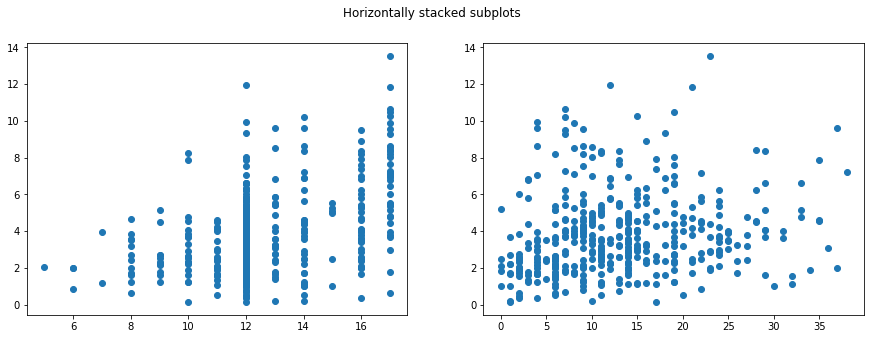

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Horizontally stacked subplots')
fig
ax1.scatter(df_use["educ"], df_use["wage"])
ax2.scatter(df_use["exper"], df_use["wage"])
plt.show()

### 13. Tester l’égalité des coefficients associés aux variables kidsge6 et kidslt6. Interprétez.

Sous $H_{0} : \beta_{kidsge6} = \beta_{kidslt6}  $  
on introduit un theta : $H_{0} : \theta = \beta_{kidsge6} - \beta_{kidslt6} = 0$  
donc $\beta_{kidsge6} = \theta + \beta_{kidslt6}$

$ Log(\widehat{wage}) = \beta_{const} + \beta_{nwifeinc}X_{nwifeinc} + \beta_{educ}X_{educ} + \beta_{exper}X_{exper} + \beta_{city}X_{city} + \beta_{kidslt6}X_{kidslt6}+ \beta_{kidsge6}X_{kidsge6} + u $  
$ Log(\widehat{wage}) = \beta_{const} + \beta_{nwifeinc}X_{nwifeinc} + \beta_{educ}X_{educ} + \beta_{exper}X_{exper} + \beta_{city}X_{city} + \beta_{kidslt6}X_{kidslt6}+ (\theta +\beta_{kidslt6})X_{kidsge6} + u $  
$ Log(\widehat{wage}) = \beta_{const} + \beta_{nwifeinc}X_{nwifeinc} + \beta_{educ}X_{educ} + \beta_{exper}X_{exper} + \beta_{city}X_{city} + \beta_{kidslt6}X_{kidslt6}+ \theta X_{kidsge6} +\beta_{kidslt6}X_{kidsge6} + u $  
$ Log(\widehat{wage}) = \beta_{const} + \beta_{nwifeinc}X_{nwifeinc} + \beta_{educ}X_{educ} + \beta_{exper}X_{exper} + \beta_{city}X_{city} + \beta_{kidslt6}(X_{kidslt6}+X_{kidsge6})+ \theta X_{kidsge6} + u $  

In [30]:
y_alter = y.copy()
s_alter = np.shape(df_use["wage"])
const_alter = const.copy()
city_alter = city.copy()
educ_alter = educ.copy()
exper_alter = exper.copy()
nwifeinc_alter = nwifeinc.copy()
kidslt6_alter = kidslt6.copy()
kidsge6_alter = kidsge6.copy()
X_alter = np.column_stack((const_alter,nwifeinc_alter, educ_alter, exper_alter,city_alter ,kidslt6_alter +kidsge6_alter,  kidsge6_alter))
model=sm.OLS(y_alter,X_alter)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     14.41
Date:                Sun, 16 May 2021   Prob (F-statistic):           6.13e-15
Time:                        16:38:52   Log-Likelihood:                -392.18
No. Observations:                 419   AIC:                             798.4
Df Residuals:                     412   BIC:                             826.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4379      0.195     -2.243      0.0

Ici on voit que le coefficient $\theta$ a une p-value de 0.472 donc à 5% non rejet de $H_0$

### 14. Faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Déterminer la ou les sources d’hétéroscédasticité et corriger avec les méthodes vues en cours. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.

In [31]:
lm = sm.stats.diagnostic.het_white(u,X)[0]
lm_pvalue = sm.stats.diagnostic.het_white(u,X)[1]
fvalue = sm.stats.diagnostic.het_white(u,X)[2]
f_pvalue = sm.stats.diagnostic.het_white(u,X)[3]

print(f"The lagrange multiplier statistic : {lm}")
print(f"The p-value of lagrange multiplier test : {lm_pvalue}")
print(f"The f-statistic of the hypothesis that the error variance does not depend on x : {fvalue}")
print(f"The p-value for the f-statistic : {f_pvalue}")

The lagrange multiplier statistic : 22.95225012076633
The p-value of lagrange multiplier test : 0.6356470564433282
The f-statistic of the hypothesis that the error variance does not depend on x : 0.8737565347072734
The p-value for the f-statistic : 0.6468960412742655


In [32]:
if 0.05 > f_pvalue : 
    print('Rejet de H0 : Il y a hétéroscédasticité')
else :
    print("Non Rejet de H0 : Il y a de l'homoscédasticité")

Non Rejet de H0 : Il y a de l'homoscédasticité


<u> Chelou car au vue de la question, on est censé avoir de l'hétéroscédasticité. <u>

### 15. Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans et les autres : test sur l'ensemble des coefficients. Donnez les p-valeurs

In [33]:
df_old = df_use.loc[df_use["age"]>43]
df_young = df_use.loc[df_use["age"]<=43]

In [34]:
y4 = np.log(df_old["wage"])
s4 = np.shape(df_old["wage"])
const4 = np.ones(s4)
city4 = df_old["city"]
educ4 = df_old["educ"]
exper4 = df_old["exper"]
nwifeinc4 = df_old["nwifeinc"]
kidslt64 = df_old["kidslt6"]
kidsge64 = df_old['kidsge6']
X4=np.column_stack((const4,city4, educ4, exper4, nwifeinc4,kidslt64 , kidsge64))
model=sm.OLS(y4,X4)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     7.287
Date:                Sun, 16 May 2021   Prob (F-statistic):           5.75e-07
Time:                        16:38:52   Log-Likelihood:                -164.96
No. Observations:                 183   AIC:                             343.9
Df Residuals:                     176   BIC:                             366.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4311      0.263     -1.639      0.1

Dans ce dataset les coefficients les plus significatifs sont les variables educ, exper, nwifeinc

In [35]:
y5 = np.log(df_young["wage"])
s5 = np.shape(df_young["wage"])
const5 = np.ones(s5)
city5 = df_young["city"]
educ5 = df_young["educ"]
exper5 = df_young["exper"]
nwifeinc5 = df_young["nwifeinc"]
kidslt65 = df_young["kidslt6"]
kidsge65 = df_young['kidsge6']
X5=np.column_stack((const5,city5, educ5, exper5, nwifeinc5,kidslt65 , kidsge65))
model=sm.OLS(y5,X5)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     8.049
Date:                Sun, 16 May 2021   Prob (F-statistic):           6.77e-08
Time:                        16:38:52   Log-Likelihood:                -223.90
No. Observations:                 236   AIC:                             461.8
Df Residuals:                     229   BIC:                             486.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5479      0.298     -1.838      0.0

Tandis que dans ce dataset, il n'y a que les variables educ, exper qui sont significatifs.  
Ainsi pour 2 datasets : la feature nwifeinc est significatif pour l'un et pas pour l'autre

###  16. Ajouter au modèle de la question 7 la variable huseduc. Faire ensuite la même régression en décomposant la variable huseduc en 4 variables binaires construites selon votre choix. Faire le test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs et commentez.

In [36]:
sorted(df_use["huseduc"].unique())

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

à 4,5,6 on va appeler la variable etude_moy  
à 7,8,9 on va appeler la variable phd  
à 10,11,12 on va appeler la variable DES  
à 13,14,15,16,17 on va appeler la variable etude_long  
Par la suite, nous décidons de créer notre régression en incluant les différentes variables binaires en fonction de la variable binaire etude_moy, il nous faut donc la supprimmer.

Voici notre modèle non constraint :
$ Log(\widehat{wage}) = \beta_{const} + \beta_{nwifeinc}X_{nwifeinc} + \beta_{educ}X_{educ} + \beta_{exper}X_{exper} + \beta_{city}X_{city} + \beta_{kidslt6}X_{kidslt6} +\beta_{kidsge6}X_{kidsge6} + \beta_{phd}X_{phd}+ \beta_{DES}X_{DES} + \beta_{etude long}X_{etude long} + u $ 

In [37]:
# Modèle non contraint :
y6 = np.log(df_use["wage"])
s6=np.shape(df_use["wage"])
const6=np.ones(s6)
city6 = df_use["city"]
educ6 = df_use["educ"]
exper6 = df_use["exper"]
nwifeinc6 = df_use["nwifeinc"]
kidslt66 = df_use["kidslt6"]
kidsge66 = df_use['kidsge6']
huseduc = pd.get_dummies(df_use["huseduc"])
etude_moy = pd.Series(huseduc[4]+ huseduc[5] + huseduc[6], name ="etude_moy")
phd = pd.Series(huseduc[7]+ huseduc[8] + huseduc[9],name = "phd")
DES = pd.Series(huseduc[10]+ huseduc[11] + huseduc[12], name ="DES")
etude_long = pd.Series(huseduc[13]+ huseduc[14] + huseduc[15] + huseduc[16] + huseduc[17], name ="etude_long")
X6=np.column_stack((const6,city6, educ6, exper6, nwifeinc6,kidslt66, kidsge66, phd ,DES, etude_long))
n6, k6 = np.shape(X6)
model=sm.OLS(y6,X6)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     10.03
Date:                Sun, 16 May 2021   Prob (F-statistic):           5.67e-14
Time:                        16:38:52   Log-Likelihood:                -390.30
No. Observations:                 419   AIC:                             800.6
Df Residuals:                     409   BIC:                             841.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5210      0.272     -1.913      0.0

In [38]:
u6=results.resid
SSRur6=u6.T@u6 # Somme des carrés des erreurs

Individuellement, nous pouvons dire que les phd, les DES et les études longues, gagnent moins bien que les étude moyennes. Leur P-value sont individuellement supérieure à 5 % ce qui signifie qu'on ne rejette pas H0, donc elles ne sont pas significative. Cependant le test de student est moins robuste que le test de Fisher, lorsqu'on a des hypothèses jointes. C'est pour cela qu'on va le calculer ci-après.

Sous $H_{0} :$  
$\beta_{phd} = 0 , \beta_{DES} = 0, \beta_{etudelong} = 0$

Notre modèle constraint :  
$ Log(\widehat{wage}) = \beta_{const} + \beta_{nwifeinc}X_{nwifeinc} + \beta_{educ}X_{educ} + \beta_{exper}X_{exper} + \beta_{city}X_{city} + \beta_{kidslt6}X_{kidslt6} +\beta_{kidsge6}X_{kidsge6} + u $ 

In [39]:
y7 = np.log(df_use["wage"])
s7=np.shape(df_use["wage"])
const7=np.ones(s7)
city7 = df_use["city"]
educ7 = df_use["educ"]
exper7 = df_use["exper"]
nwifeinc7 = df_use["nwifeinc"]
kidslt67 = df_use["kidslt6"]
kidsge67 = df_use['kidsge6']
X7=np.column_stack((const6,city6, educ6, exper6, nwifeinc6,kidslt66, kidsge66))
model=sm.OLS(y6,X6)
results = model.fit()
u7=results.resid
SSRr7=u7.T@u7 # Somme des carrés des erreurs

In [40]:
F=((SSRr7-SSRur6)/3)/(SSRur6/(n6-k6)) # 3 contraintes et 409 ddl pour le modèle non constraint
print("Stats de Fisher : ", F)
print("p value :", f.sf(F,3,n6-k6))

if f.sf(F,3,n6-k6) > 0.05 :
    print("Non rejet de H0, les 4 coefficients binaires sont donc non significatifs")
else :
    print("Rejet de H0, les 4 coefficients binaires sont donc significatifs")

Stats de Fisher :  0.0
p value : 1.0
Non rejet de H0, les 4 coefficients binaires sont donc non significatifs
